In [104]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/banknote-authentication-uci/BankNoteAuthentication.csv


# 🏦 Banknote Authentication Dataset


📌 **Author's Profiles:**  
- 🐍 **Kaggle:** [My Kaggle Profile](https://www.kaggle.com/crissyro)  
- 💻 **GitHub:** [My GitHub Profile](https://github.com/crissyro)  

---

## 📌 About the Dataset
This dataset is designed for **banknote authentication** using machine learning models. The data was extracted from images of genuine and forged banknotes. To digitize the images, an industrial camera commonly used for print inspection was used, capturing grayscale images at a resolution of approximately **660 dpi**.

Wavelet Transform techniques were applied to extract numerical features from the images, enabling a machine learning approach for classification.

🔗 **Source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/banknote+authentication#)

---

## 🔢 Dataset Overview
This dataset consists of **continuous numerical features** derived from image processing and a **binary class label** indicating whether a banknote is genuine or forged.

## Columns Description 📋

| Feature | Description |
|---------|-------------|
| **Variance** | Variance of the wavelet-transformed image |
| **Skewness** | Skewness of the wavelet-transformed image |
| **Curtosis** | Curtosis of the wavelet-transformed image |
| **Entropy** | Entropy of the image |
| **Class** | 0: Forged banknote, 1: Genuine banknote |

---

## 🔍 Analysis Plan

1. **Exploratory Data Analysis (EDA) 📊**  
   - Visualizing distributions of key features  
   - Checking for missing values and outliers  
   - Correlation heatmap of features  

2. **Data Preprocessing 🏗️**  
   - Scaling numerical features  
   - Encoding categorical features if necessary   

3. **Model Training & Evaluation 🤖**  
   - Training classification models
   - Evaluating performance with accuracy, precision, recall, and F1-score
   - 
4. **Insights & Conclusion 📌**  
   - Key takeaways from the analysis  
   - Recommendations for further improvement  

---

📌 **Stay tuned for the full analysis! 🚀**  

---

### Make import the necessary libraries 📚 and also make some settings for visualization 📊 and ignoring errors 🚫

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
from plotly.offline import init_notebook_mode
import warnings

init_notebook_mode(connected=True)
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-pastel')
sns.set_theme(style='whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

### Read dataset in dataframe with pandas 🐼 and check count of rows and columns

In [106]:
df = pd.read_csv('/kaggle/input/banknote-authentication-uci/BankNoteAuthentication.csv')

print(df.shape)
df.head().style.background_gradient(cmap='Blues', axis=1)

(1372, 5)


,variance,skewness,curtosis,entropy,class
0,3.621600,8.666100,-2.807300,-0.446990,0
1,4.545900,8.167400,-2.458600,-1.462100,0
2,3.866000,-2.638300,1.924200,0.106450,0
3,3.456600,9.522800,-4.011200,-3.594400,0
4,0.329240,-4.455200,4.571800,-0.988800,0


### General info about dataset 🖼️

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [108]:
df.describe().T.style.background_gradient(cmap='Blues', axis=1)

,count,mean,std,min,25%,50%,75%,max
variance,1372.000000,0.433735,2.842763,-7.042100,-1.773000,0.496180,2.821475,6.824800
skewness,1372.000000,1.922353,5.869047,-13.773100,-1.708200,2.319650,6.814625,12.951600
curtosis,1372.000000,1.397627,4.310030,-5.286100,-1.574975,0.616630,3.179250,17.927400
entropy,1372.000000,-1.191657,2.101013,-8.548200,-2.413450,-0.586650,0.394810,2.449500
class,1372.000000,0.444606,0.497103,0.000000,0.000000,0.000000,1.000000,1.000000


### Check missing values 0️⃣

In [109]:
df.isnull().sum()


variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

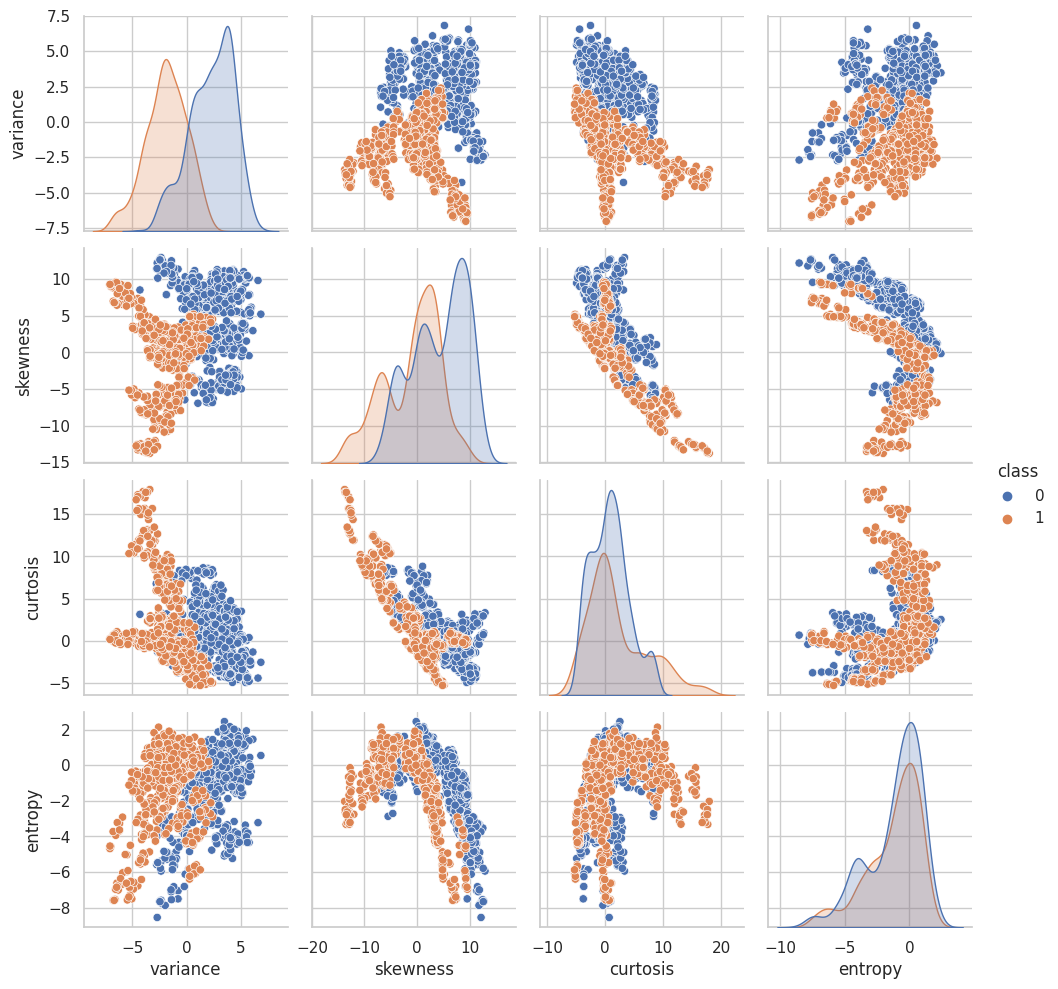

In [110]:
sns.pairplot(data=df, kind='scatter', diag_kind='kde', hue='class');

In [111]:
count_genders = df['class'].value_counts()
fig = px.pie(count_genders, values=count_genders.values, names=count_genders.index, 
            title='Count of different class in dataframe')
fig.show(renderer='iframe_connected')

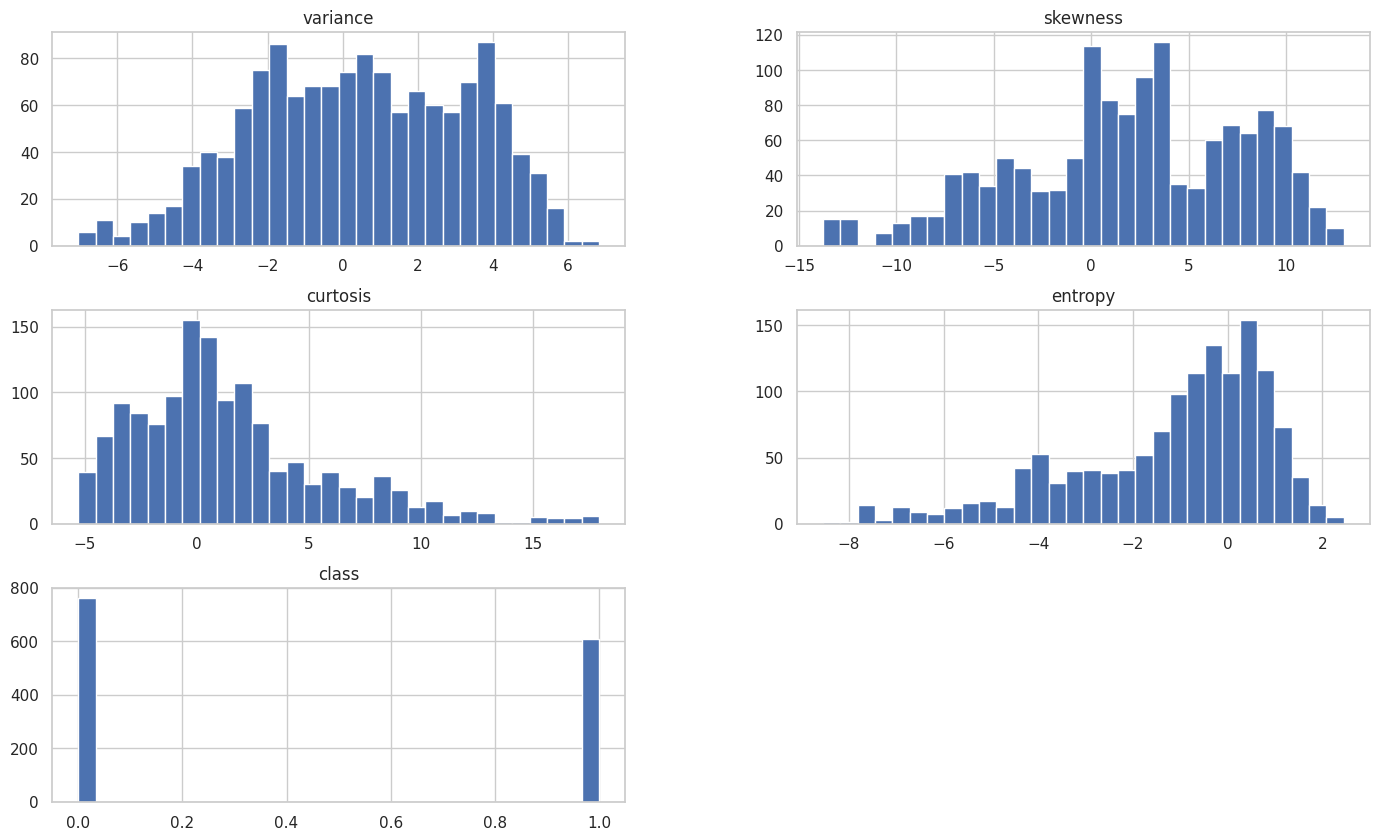

In [112]:
df.hist(bins=30, figsize=(17, 10));

In [113]:
fig = px.density_heatmap(
    df,
    x='variance',
    y='curtosis',
    facet_row='class',
    
    width=1200,  
    height=800, 
    
    facet_row_spacing=0.1, 
    facet_col_spacing=0.1, 
    
    text_auto=True,    
)

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  
    autosize=False, 
    font_size=12 
)

fig.show(renderer='iframe_connected')

In [114]:
fig = px.density_heatmap(
    df,
    x='variance',
    y='entropy',
    facet_row='class',
    
    width=1200,  
    height=800, 
    
    facet_row_spacing=0.1, 
    facet_col_spacing=0.1, 
    
    text_auto=True,    
)

fig.update_layout(
    margin=dict(l=50, r=50, t=50, b=50),  
    autosize=False, 
    font_size=12 
)

fig.show(renderer='iframe_connected')

In [115]:
fig = px.histogram(df, x='variance', y='curtosis', color='class')
fig.show(renderer='iframe_connected')

In [116]:
fig = px.histogram(df, x='variance', y='skewness', color='class')
fig.show(renderer='iframe_connected')

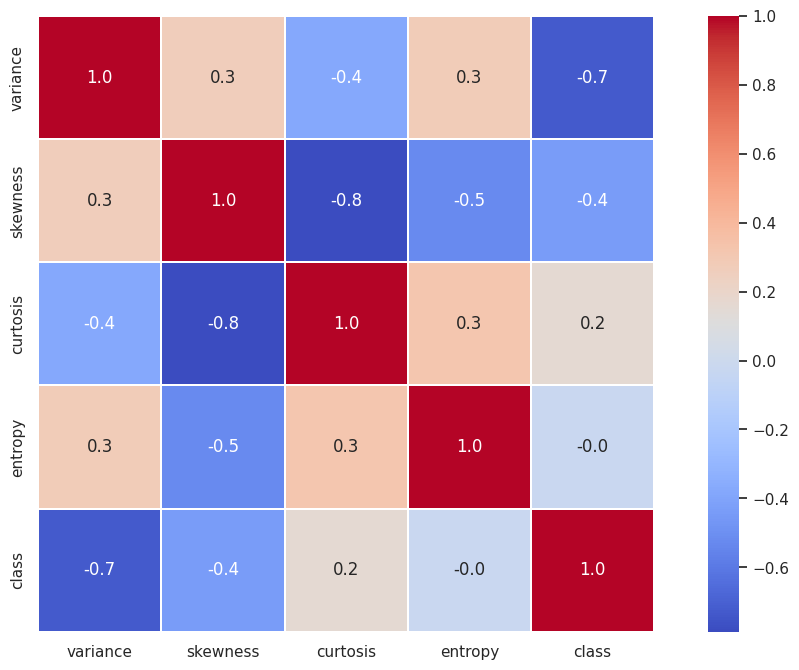

In [117]:
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, square=True,
            annot=True, fmt='.1f', linewidths=0.1, cmap='coolwarm');

In [118]:
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

for col in df.select_dtypes(include=['number']).columns:
    df = handle_outliers(df, col)

df.shape

(1372, 5)

## 🎯 Machine Learning Models & Evaluation
To build a robust classification model for banknote authentication, we trained and evaluated the following machine learning models:

- **Logistic Regression** 📈 (Interpretable and efficient for binary classification)
- **Support Vector Machine (SVM)** 🛠️ (Effective for high-dimensional spaces)
- **Gradient Boosting Classifier** 🚀 (Ensemble learning for better performance)

### 🏋️ Model Training & Cross-Validation
To ensure the model's reliability, we used **cross-validation** to evaluate the performance. This approach helps reduce overfitting and provides a more generalized model.

---

In [119]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, 
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline


════════════════════════════════════════════════════════════
################### Comparison of models ###################
════════════════════════════════════════════════════════════


,Accuracy,Precision,Recall,F1,ROC AUC
Model,,,,,
Logistic Regression,0.99,0.99,1.00,0.99,1.00
SVM,1.00,0.99,1.00,1.00,1.00
Gradient Boosting,1.00,0.99,1.00,1.00,1.00


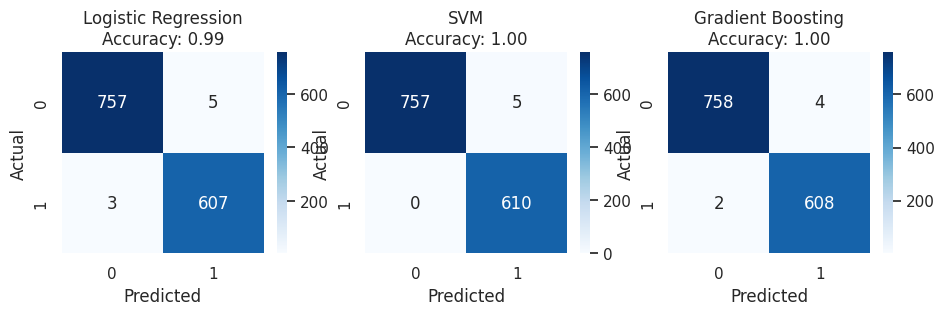

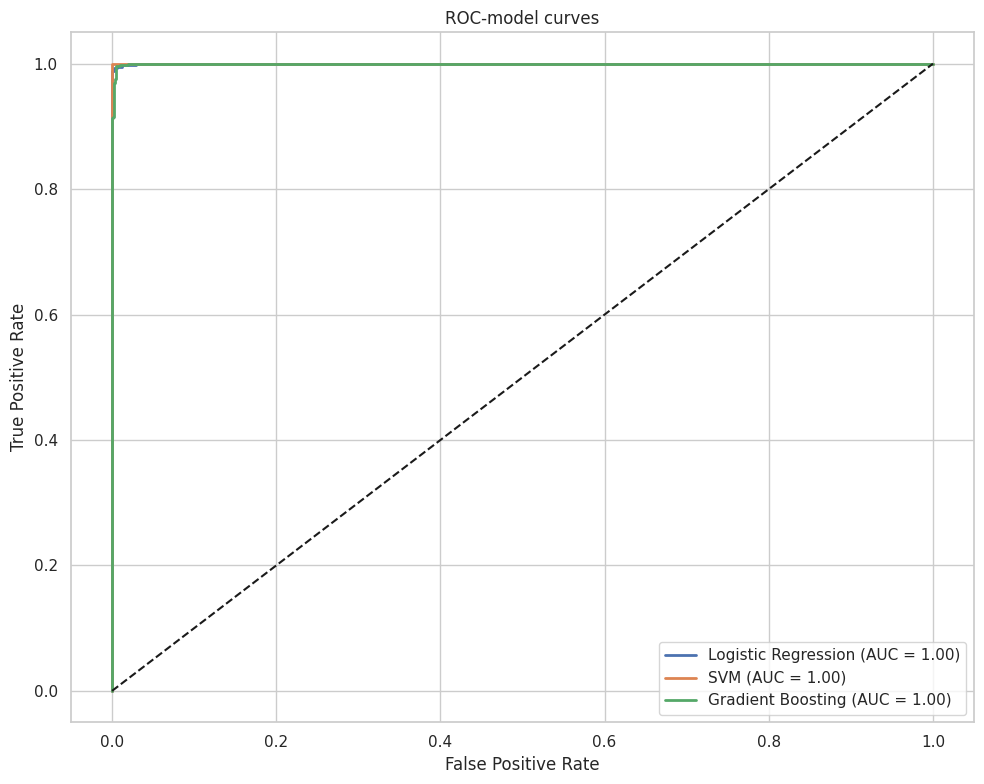

In [120]:
X =  df.drop('class', axis=1)
y = df['class']

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'Gradient Boosting': GradientBoostingClassifier(),
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

metrics = []
plt.figure(figsize=(15, 12))

for i, (name, model) in enumerate(models.items(), 1):
    y_pred = cross_val_predict(model, X, y, cv=cv)
    y_proba = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:,1]
    
    metrics.append({
        'Model': name,
        'Accuracy': accuracy_score(y, y_pred),
        'Precision': precision_score(y, y_pred),
        'Recall': recall_score(y, y_pred),
        'F1': f1_score(y, y_pred),
        'ROC AUC': roc_auc_score(y, y_proba)
    })
    
    cm = confusion_matrix(y, y_pred)
    plt.subplot(4, 4, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name}\nAccuracy: {metrics[-1]["Accuracy"]:.2f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.figure(figsize=(10, 8))
for name, model in models.items():
    model = clone(model)
    fpr, tpr, _ = roc_curve(y, cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:,1])
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc_score(y, cross_val_predict(model, X, y, cv=cv, method="predict_proba")[:,1]):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-model curves')
plt.legend(loc='lower right')

metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Model', inplace=True)

print('\n' + '═'*60)
print(f'{" Comparison of models ":#^60}')
print('═'*60)

display(metrics_df.style
    .background_gradient(cmap='Blues', subset=['Accuracy', 'ROC AUC'])
    .format('{:.2f}', subset=['Accuracy', 'Precision', 'Recall', 'F1', 'ROC AUC']))

plt.tight_layout()
plt.show()

## 📊 Performance Metrics
Each model was evaluated based on the following classification metrics:

- **Accuracy** ✅: Overall correctness of the model
- **Precision** 🎯: Correct positive predictions among predicted positives
- **Recall** 🔄: Ability to identify actual positive cases
- **F1 Score** ⚖️: Harmonic mean of Precision and Recall
- **ROC AUC** 📊: Measures the ability to distinguish between classes

### 📈 Model Performance Results
| Model | Accuracy | Precision | Recall | F1 Score | ROC AUC |
|--------|----------|------------|--------|----------|--------|
| **Logistic Regression** 📈 | 0.99 | 0.99 | 1.00 | 0.99 | 1.00 |
| **SVM** 🛠️ | 1.00 | 0.99 | 1.00 | 1.00 | 1.00 |
| **Gradient Boosting** 🚀 | 1.00 | 0.99 | 1.00 | 1.00 | 1.00 |

---

## 🔍 Key Insights
✔️ **Gradient Boosting and SVM achieved perfect classification** with 100% accuracy and ROC AUC.
✔️ **Logistic Regression performed slightly lower** but still achieved high accuracy (99%).
✔️ **Wavelet Transform features effectively separate genuine and forged banknotes**, making this a well-structured dataset for authentication tasks.

🚀 This dataset is well-suited for further **feature engineering**, **hyperparameter tuning**, and **ensemble learning experiments**!

---

## 📌 Conclusion
This dataset demonstrates the power of **machine learning** in detecting forged banknotes with **high precision**. With well-selected features from **Wavelet Transforms**, even simple models like **Logistic Regression** perform exceptionally well.

🔍 Future improvements could involve **neural networks** or **deep learning approaches** for even better performance in real-world applications!

---




📢 **Thank you for your time and attention!** If you have any suggestions or improvements, feel free to reach out! Your feedback is highly appreciated. 🎯  

💬 **Comments & Discussions are welcome!** Let's improve this analysis together. 🚀  